<a href="https://colab.research.google.com/github/Axargon/ds_portfolio/blob/master/Analisando_os_Dados_do_Airbnb_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="10%" src="https://raw.githubusercontent.com/Axargon/ds_portfolio/master/AxargonLogo.png">

#### **Projeto de Data Science 1.0**
*by Alex Arantes Gonçalves*

---

# Análise dos Dados do Airbnb - *Toronto*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Toronto no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Os dados aqui analisados foram obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratoria, sera utilizado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Troronto (good fir visualisations).*



In [46]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2020-06-08/visualisations/listings.csv")


## Análise dos Dados
Esta etapa do processo tem por objetivo identificar e compreender como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de identificação único e distindo gerado para diferenciar cada imóvel
* `name` - nome da propriedade listada no cadastro do imóvel
* `host_id` -  número de identificação do proprietário da propriedade
* `host_name` - nome do proprietário do imóvel
* `neighbourhood_group` - atributo sem valor válido e portanto sem uma definição clara
* `neighbourhood` -  nome do  bairro
* `latitude` -  coordenada de latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - o valor de aluguel do imóvel por noite
* `minimum_nights` - quantidade mínima de noites para locação
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` -  data da última avaliação
* `reviews_per_month`- quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [48]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.12,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,100,180,169,2013-08-27,1.28,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,67,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,217,2019-12-22,1.78,2,116
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,119,21,40,2020-03-20,0.35,5,284


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Dando prosseguimento a análise, vamos verificar a quantidade de entrada do nosso conjunto de dados e listar o tipos de cada coluna.

Este *dataset* que adquirimos no site do Airbnb é uma versão reduzida com 16 atributos. Na mesma página está disponível um arquivo masi completa com 106 atributos (o arquivo `listings.csv.gz)`.

In [49]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 21166
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um conjunto de dados - *dataset* - está diretamente relacionada à completude do mesmo, portanto analisar e calcular a quantidade de entradas ausentes por atributo se torna uma das nossas prioridades neste processo de análise exploratória.
* O atributo `neighbourhood_group` como mencionado anteriormente não possui qualquer preenchimento portanto 100% de seus valores faltantes
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em apenas 20% dos casos
* O restante dos atributos possuem menos de 1% de valores não preenchidos


In [50]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))*100

neighbourhood_group               100.000000
reviews_per_month                  20.008504
last_review                        20.008504
host_name                           0.009449
name                                0.004725
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Verificaremos agora a distribuição das variáveis por meio da plotagem do histograma de cada um dos atributos.

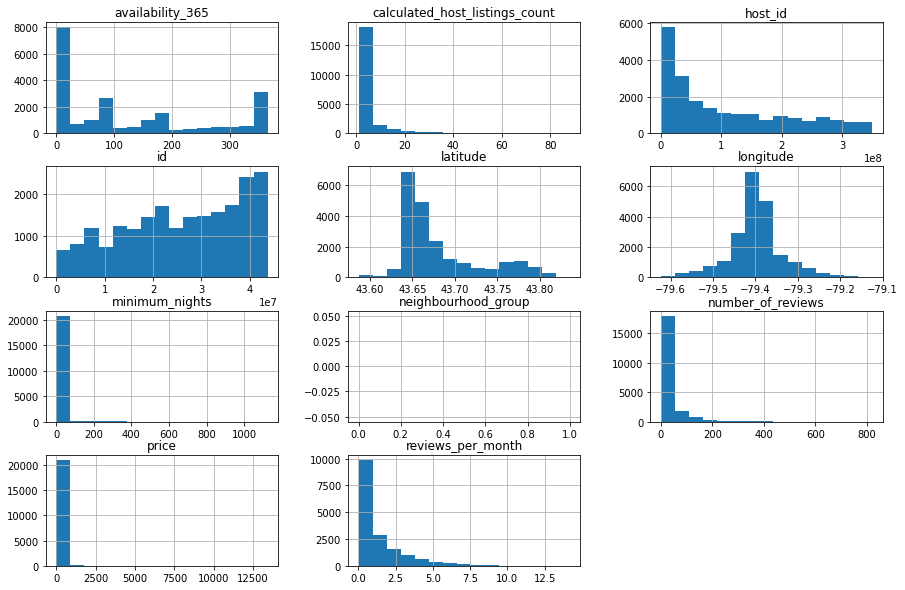

In [51]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**


Para que se tenha um panorama estatística da variável alvo, extraimos os principais indicadores estatísticos para continuar a análise exploratória.

In [52]:
# ver a média da coluna `price``
df[['price', 'minimum_nights']].describe()


,price,minimum_nights
count,21166.000000,21166.000000
mean,143.133280,8.922470
std,279.390428,33.194412
min,0.000000,1.000000
25%,64.000000,1.000000
50%,100.000000,2.000000
75%,150.000000,5.000000
max,13419.000000,1125.000000


Como observado:
* A absoluta maioria dos valores dos preços dos aluguéis se encontra abaixo de C\$ 150,00 por noite, bem abaixo do valor máximo de  C\$  13419,00.
* Da mesma forma,a maior parte da quantidade de noites mínimas do atributo ´minimum_nights´ também se encontra abaixo de 5 noites, bem além do valor máximo de 1125 noites!

O que nos leva a conclusão da existência de *outliers*.

Esta conclusão pode ser confirmada por meio dos hitogramas anteriormente plotados. Tais dados não seguem uma distribuição e distorcem toda a representação gráfica. Afim de se obter uma deteção rápida dos *outliers* utilizaremos `bloxplots`.

####Bloxplot para os atributos *price* e *minimum_nights*:

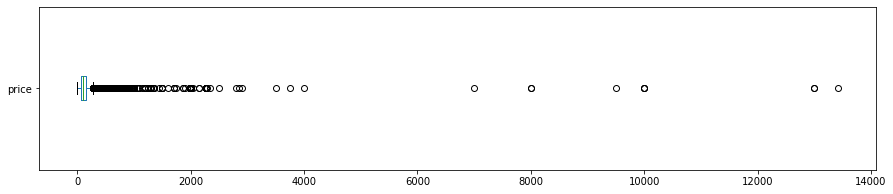

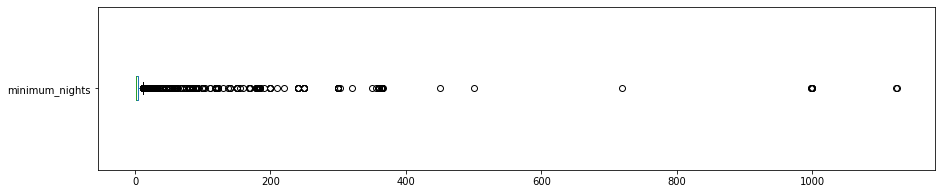

In [53]:
#price
df.price.plot(kind = 'box', vert = False, figsize=(15,3))
plt.show()

#minimum_nights:
df.minimum_nights.plot(kind = 'box', vert = False, figsize =(15,3))

In [54]:
#quantidade de valores acima de 1500 para preço:
print("preço - valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.3f}% do total de dados".format((len(df[df.price> 1500])/df.shape[0])*100))

#quantidade de valores acima de 30 para minimum_nights:
print("minimum - valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.3f}% do total de dados".format((len(df[df.minimum_nights > 30])/df.shape[0])*100))

preço - valores acima de 1500:
71 entradas
0.335% do total de dados
minimum - valores acima de 30:
569 entradas
2.688% do total de dados


#### Histogramas sem *outliers*
Uma vez identificados os *outliers* nas variáveis `price` e `minimum_nights` podemos agora limpar o *DataFrame* excluindo estes dados e plotar novamente os histogramas.

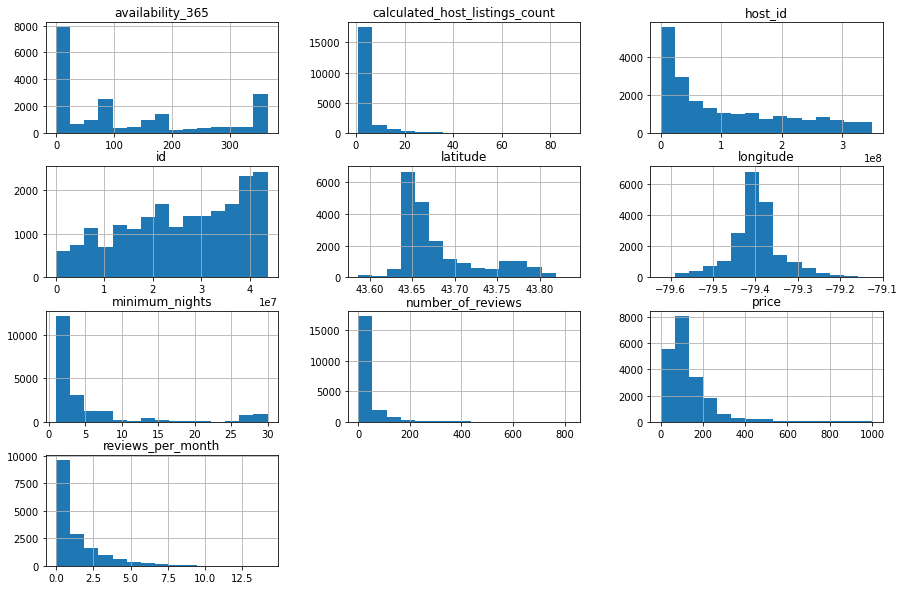

In [58]:
#remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index,axis=0,inplace= True)

#remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group',axis = 1, inplace=True)

#plotar os histogramas para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));



### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa a interdependencia entre duas ou mais coisas. No nosso contexto, estamos buscando alguma relação ou similaridade entre duas variáveis.

Esta possível correlação pode ser mensurada, esta é a função do coeficiente de correlação de estabelecer a intensidade dela. Para identificar as correlações existente entres as variáveis de interesse, pode-se:

* Criar uma matriz de correlação
*Gerar um *heatmap* a partir dessa matriz utilizando-se da biblioteca seaborn

In [60]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.002071,-0.014260,0.048292,0.037181,0.033826
minimum_nights,-0.002071,1.000000,-0.029690,-0.036230,0.087554,0.110097
number_of_reviews,-0.014260,-0.029690,1.000000,0.773615,-0.047436,0.080342
reviews_per_month,0.048292,-0.036230,0.773615,1.000000,-0.041263,0.048861
calculated_host_listings_count,0.037181,0.087554,-0.047436,-0.041263,1.000000,0.166873
availability_365,0.033826,0.110097,0.080342,0.048861,0.166873,1.000000


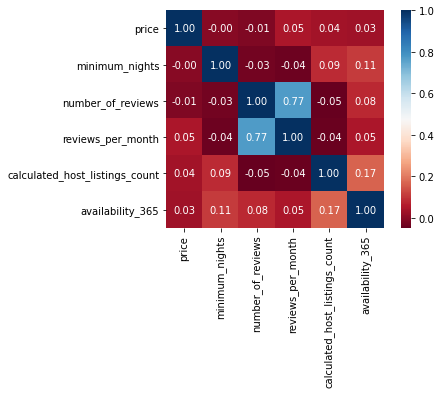

In [61]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt = '.2f', square = True, linecolor='white',annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação ofertada no AirBnb. Existem opções como apartamentos/casas inteiras, apenas um quarto, ou até mesmo dividir um quarto com toutras pessoas.

É possível contar a quantidade distinta das ocorrências de aluguel usando o método `value_counts()`.

In [62]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    12936
Private room        7127
Shared room          378
Hotel room            66
Name: room_type, dtype: int64

In [63]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df_clean.shape[0]) *100

Entire home/apt    63.080899
Private room       34.753986
Shared room         1.843273
Hotel room          0.321841
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma forma de se verificar a correlação de uma variável em função da outra é se utilizando o método `groupby()`. Como o interesse no caso é o de comparar os bairros (*neighbourhoods*) em relação ao preço de locação



In [66]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending= False)[:10]


neighbourhood
Kingsway South                       195.650000
Leaside-Bennington                   191.326087
Waterfront Communities-The Island    187.561159
Rosedale-Moore Park                  185.645455
Lawrence Park South                  163.793103
Niagara                              161.510204
Casa Loma                            159.095890
St.Andrew-Windfields                 158.406780
Bay Street Corridor                  155.352090
The Beaches                          154.289617
Name: price, dtype: float64

Como as coordenadas de latitude e longitude são fornecidas, é possível plotar cada ponto. para isso se considera `x=longitude` e `y=latitude`.

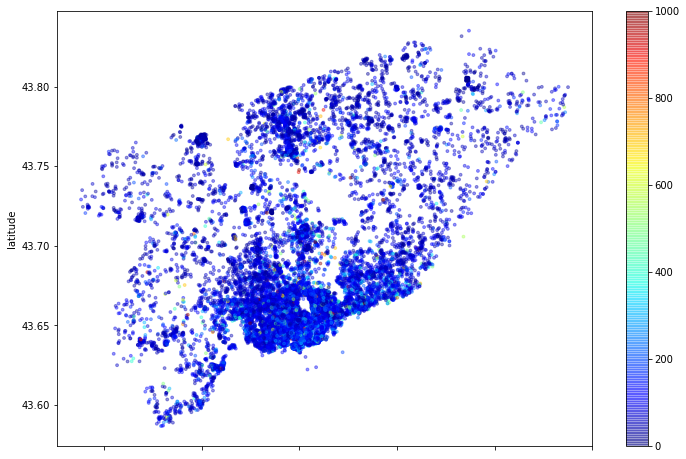

In [70]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões
Foi realizada apenas uma análise superficial na base de dados do Airbnb, mas ja é possível identificar atributos com *outliers*.
Tambem se nota que a distribuição de oferta de imóveis é mais concentrada ao sul da cidade, o que pode distorcer algumas informações estatística de alguns atributos

Por fim lembra-se que se trata de um *dataset* resumido, ideal para uma abordagem inicial, portanto recomenda-se a utilização da versão completa com todos os 106 atributos disponíveis para uma possível análise exploratória futura.

